In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/balanced_ai_human_prompts.csv')
data

text  generated
0     Machine learning, a subset of artificial intel...          1
1     A decision tree, a prominent machine learning ...          1
2     Education, a cornerstone of societal progress,...          1
3     Computers, the backbone of modern technology, ...          1
4     Chess, a timeless game of strategy and intelle...          1
...                                                 ...        ...
2745  Generate a detailed summary of global healthca...          1
2746  Compose an in-depth exploration of financial t...          1
2747  Generate a detailed summary of autonomous vehi...          1
2748  Develop a persuasive argument about internet o...          1
2749  Generate a detailed summary of supply chain ma...          1

[2750 rows x 2 columns]

# **EDA**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

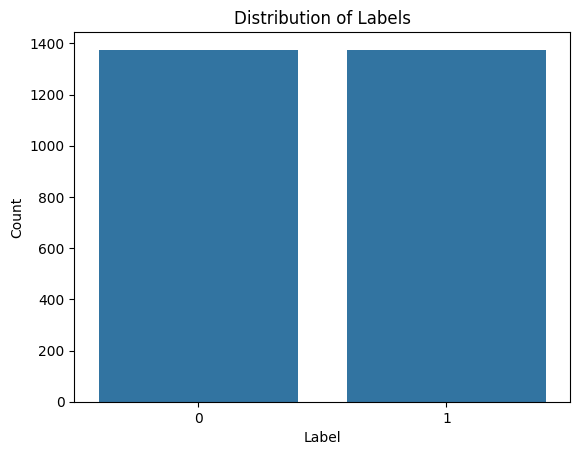

In [ ]:
sns.countplot(x='generated', data=data)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# **Words generated by ai:**

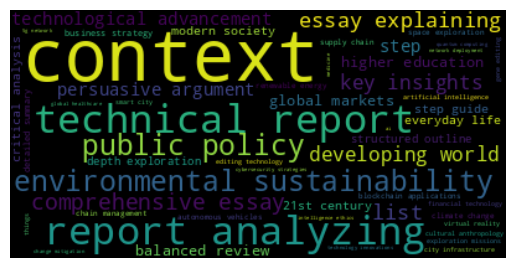

In [ ]:
Revs = data[(data["generated"]==1)]

txt= " ".join(text.lower() for text in Revs["text"].astype(str))
wordcloud= WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Words not generates by ai:**

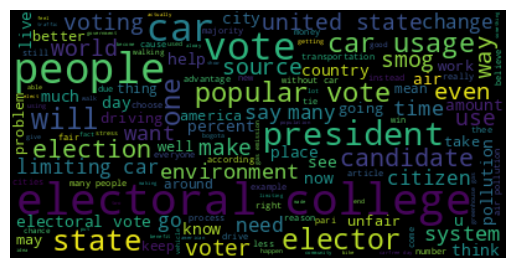

In [ ]:
Revs = data[(data["generated"]==0)]

txt= " ".join(text.lower() for text in Revs["text"].astype(str))
wordcloud= WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

count    2750.000000
mean      290.771273
std       291.090474
min        13.000000
25%        14.000000
50%       304.500000
75%       525.000000
max      1360.000000
Name: word_count, dtype: float64


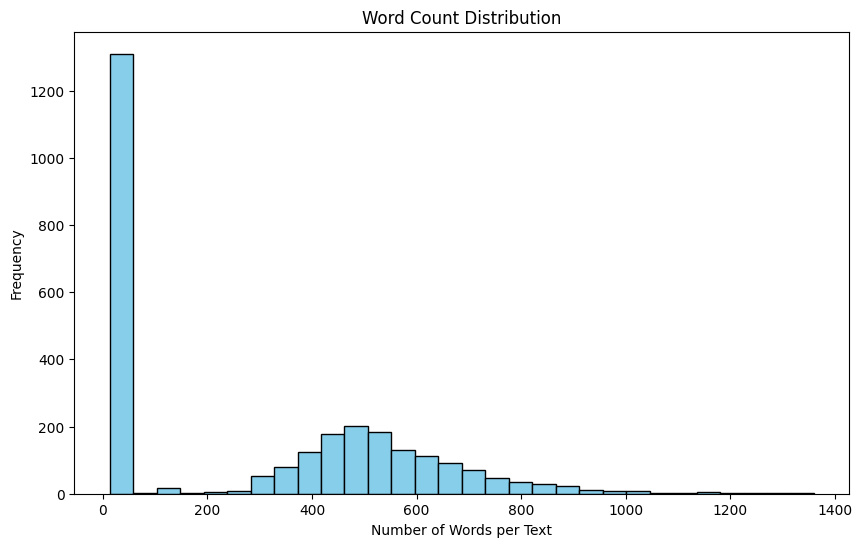

In [ ]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

# Display basic statistics
print(data['word_count'].describe())

# Plot histogram of word counts
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title("Word Count Distribution")
plt.xlabel("Number of Words per Text")
plt.ylabel("Frequency")
plt.show()

In [ ]:
def lexical_diversity(text):
    words = str(text).lower().split()
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

data['lexical_diversity'] = data['text'].apply(lexical_diversity)

print(data['lexical_diversity'].describe())

count    2750.000000
mean        0.700590
std         0.234284
min         0.321631
25%         0.478171
50%         0.599332
75%         0.928571
max         1.000000
Name: lexical_diversity, dtype: float64


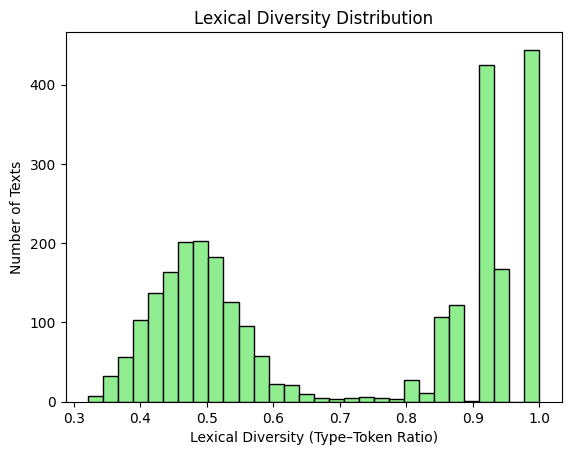

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['lexical_diversity'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Lexical Diversity Distribution")
plt.xlabel("Lexical Diversity (Type–Token Ratio)")
plt.ylabel("Number of Texts")
plt.show()

# **pre-processing and feature engineering:**

In [ ]:
!pip install nltk

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.2 MB/s eta 0:00:00


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 27.9 MB/s eta 0:00:00


In [ ]:
import re
import emoji
import contractions
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1311733162.py:2: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub('RT\s+', default_replace, tweet)


In [ ]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
/tmp/ipython-input-1169086728.py:2: SyntaxWarning: invalid escape sequence '\B'
  tweet = re.sub('\B@\w+', default_replace, tweet)


In [ ]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [ ]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

<>:2: SyntaxWarning: invalid escape sequence '\/'
<>:2: SyntaxWarning: invalid escape sequence '\/'
/tmp/ipython-input-933450514.py:2: SyntaxWarning: invalid escape sequence '\/'
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)


In [ ]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [ ]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [ ]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [ ]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [ ]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [ ]:
token = data['text'].apply(tokenize)

In [ ]:
token

0       [Machine, learning, ,, a, subset, of, artifici...
1       [A, decision, tree, ,, a, prominent, machine, ...
2       [Education, ,, a, cornerstone, of, societal, p...
3       [Computers, ,, the, backbone, of, modern, tech...
4       [Chess, ,, a, timeless, game, of, strategy, an...
                              ...                        
2745    [Generate, a, detailed, summary, of, global, h...
2746    [Compose, an, in-depth, exploration, of, finan...
2747    [Generate, a, detailed, summary, of, autonomou...
2748    [Develop, a, persuasive, argument, about, inte...
2749    [Generate, a, detailed, summary, of, supply, c...
Name: text, Length: 2750, dtype: object

In [ ]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.discard('not')
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'o

In [ ]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):

  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list #custome tokenize function

In [ ]:
tokenized = data['text'].apply(custom_tokenize)

In [ ]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = tweet.lower() # lower case
  tweet = _fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [ ]:
tokenized_tweets = data['text'].apply(process_tweet)

In [ ]:
tokenized_tweets

0       [machin, learn, subset, artifici, intellig, ra...
1       [decis, tree, promin, machin, learn, algorithm...
2       [educ, cornerston, societ, progress, extend, b...
3       [comput, backbon, modern, technolog, revolutio...
4       [chess, timeless, game, strategi, intellect, t...
                              ...                        
2745    [generat, detail, summari, global, healthcar, ...
2746    [compos, explor, financi, technolog, innov, co...
2747    [generat, detail, summari, autonom, vehicl, co...
2748    [develop, persuas, argument, internet, thing, ...
2749    [generat, detail, summari, suppli, chain, mana...
Name: text, Length: 2750, dtype: object

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

def get_wordnet_pos(treebank_tag):
    """Convert Treebank POS tags to WordNet POS tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

def lemmatize_tokens(tokens):
    """Lemmatize tokens automatically based on their POS tags."""
    lemmatizer = WordNetLemmatizer()
    pos_tags = pos_tag(tokens)  # Get POS tags for all tokens
    lemmatized = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]
    return lemmatized

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
final_tokenized = tokenized_tweets.apply(lemmatize_tokens)

In [ ]:
final_tokenized

0       [machin, learn, subset, artifici, intellig, ra...
1       [decis, tree, promin, machin, learn, algorithm...
2       [educ, cornerston, societ, progress, extend, b...
3       [comput, backbon, modern, technolog, revolutio...
4       [chess, timeless, game, strategi, intellect, t...
                              ...                        
2745    [generat, detail, summari, global, healthcar, ...
2746    [compos, explor, financi, technolog, innov, co...
2747    [generat, detail, summari, autonom, vehicl, co...
2748    [develop, persuas, argument, internet, thing, ...
2749    [generat, detail, summari, suppli, chain, mana...
Name: text, Length: 2750, dtype: object

# **Text Representation:**

In [ ]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 107.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
data

text  generated  \
0     Machine learning, a subset of artificial intel...          1   
1     A decision tree, a prominent machine learning ...          1   
2     Education, a cornerstone of societal progress,...          1   
3     Computers, the backbone of modern technology, ...          1   
4     Chess, a timeless game of strategy and intelle...          1   
...                                                 ...        ...   
2745  Generate a detailed summary of global healthca...          1   
2746  Compose an in-depth exploration of financial t...          1   
2747  Generate a detailed summary of autonomous vehi...          1   
2748  Develop a persuasive argument about internet o...          1   
2749  Generate a detailed summary of supply chain ma...          1   

      word_count  lexical_diversity  
0             96           0.760417  
1            103           0.825243  
2             93           0.827957  
3             92           0.793478  
4            110           0.754545  
...          ...                ...  
2745          13           0.923077  
2746          14           0.928571  
2747          14           0.857143  
2748          14           0.928571  
2749          14           0.928571  

[2750 rows x 4 columns]

In [ ]:
data["tokens"] = data["text"].apply(process_tweet)

data.head(10)

text  generated  word_count  \
0  Machine learning, a subset of artificial intel...          1          96   
1  A decision tree, a prominent machine learning ...          1         103   
2  Education, a cornerstone of societal progress,...          1          93   
3  Computers, the backbone of modern technology, ...          1          92   
4  Chess, a timeless game of strategy and intelle...          1         110   
5  Calculus, a cornerstone of mathematical explor...          1         128   
6  Electronics, the backbone of modern technology...          1         121   
7  Data Science, a multidisciplinary field at the...          1         127   
8  Artificial Intelligence (AI), a branch of comp...          1         120   
9  Laptops, compact and portable computing device...          1         121   

   lexical_diversity                                             tokens  
0           0.760417  [machin, learn, subset, artifici, intellig, ra...  
1           0.825243  [decis, tree, promin, machin, learn, algorithm...  
2           0.827957  [educ, cornerston, societ, progress, extend, b...  
3           0.793478  [comput, backbon, modern, technolog, revolutio...  
4           0.754545  [chess, timeless, game, strategi, intellect, t...  
5           0.703125  [calculus, cornerston, mathemat, explor, provi...  
6           0.702479  [electron, backbon, modern, technolog, encompa...  
7           0.748031  [data, scienc, multidisciplinari, field, inter...  
8           0.808333  [artifici, intellig, ai, branch, comput, scien...  
9           0.752066  [laptop, compact, portabl, comput, devic, beco...

In [ ]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

In [ ]:
corpus = data['tokens'].tolist()
sentiment = data['generated'].tolist()
corpus

[['machin',
  'learn',
  'subset',
  'artifici',
  'intellig',
  'rapid',
  'emerg',
  'transform',
  'forc',
  'revolution',
  'industri',
  'redefin',
  'possibl',
  'technolog',
  'core',
  'machin',
  'learn',
  'enabl',
  'comput',
  'learn',
  'data',
  'make',
  'inform',
  'decis',
  'without',
  'explicit',
  'program',
  'applic',
  'rang',
  'imag',
  'recognit',
  'languag',
  'process',
  'autonom',
  'system',
  'machin',
  'learn',
  'continu',
  'advanc',
  'bring',
  'opportun',
  'challeng',
  'issu',
  'bias',
  'transpar',
  'privaci',
  'demand',
  'care',
  'consider',
  'impact',
  'machin',
  'learn',
  'profound',
  'shape',
  'futur',
  'intellig',
  'system',
  'contribut',
  'effici',
  'innov',
  'interconnect',
  'world'],
 ['decis',
  'tree',
  'promin',
  'machin',
  'learn',
  'algorithm',
  'structur',
  'model',
  'node',
  'repres',
  'decis',
  'branch',
  'signifi',
  'outcom',
  'leav',
  'denot',
  'final',
  'decis',
  'predict',
  'algorithm',


In [ ]:
sentiment

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
freqs = build_freqs(corpus, sentiment)

In [ ]:
print(freqs)

{('machin', 1): 15, ('learn', 1): 23, ('subset', 1): 1, ('artifici', 1): 74, ('intellig', 1): 78, ('rapid', 1): 13, ('emerg', 1): 10, ('transform', 1): 28, ('forc', 1): 4, ('revolution', 1): 10, ('industri', 1): 32, ('redefin', 1): 4, ('possibl', 1): 11, ('technolog', 1): 336, ('core', 1): 8, ('enabl', 1): 8, ('comput', 1): 76, ('data', 1): 27, ('make', 1): 38, ('inform', 1): 17, ('decis', 1): 10, ('without', 1): 6, ('explicit', 1): 1, ('program', 1): 4, ('applic', 1): 117, ('rang', 1): 15, ('imag', 1): 4, ('recognit', 1): 4, ('languag', 1): 12, ('process', 1): 18, ('autonom', 1): 84, ('system', 1): 39, ('continu', 1): 25, ('advanc', 1): 182, ('bring', 1): 5, ('opportun', 1): 9, ('challeng', 1): 56, ('issu', 1): 9, ('bias', 1): 10, ('transpar', 1): 8, ('privaci', 1): 16, ('demand', 1): 8, ('care', 1): 6, ('consider', 1): 30, ('impact', 1): 41, ('profound', 1): 9, ('shape', 1): 25, ('futur', 1): 28, ('contribut', 1): 28, ('effici', 1): 19, ('innov', 1): 104, ('interconnect', 1): 7, ('wo

In [ ]:
import numpy as np
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

In [ ]:
print(tweet_to_freq(["transform", "rapid"], freqs))

[41. 35.]


In [ ]:
#function which takes tweet list & Sentiment & Return frequency directornary
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

In [ ]:
freqs_all = build_freqs(corpus, sentiment)

In [ ]:
freqs_all

{('machin', 1): 15,
 ('learn', 1): 23,
 ('subset', 1): 1,
 ('artifici', 1): 74,
 ('intellig', 1): 78,
 ('rapid', 1): 13,
 ('emerg', 1): 10,
 ('transform', 1): 28,
 ('forc', 1): 4,
 ('revolution', 1): 10,
 ('industri', 1): 32,
 ('redefin', 1): 4,
 ('possibl', 1): 11,
 ('technolog', 1): 336,
 ('core', 1): 8,
 ('enabl', 1): 8,
 ('comput', 1): 76,
 ('data', 1): 27,
 ('make', 1): 38,
 ('inform', 1): 17,
 ('decis', 1): 10,
 ('without', 1): 6,
 ('explicit', 1): 1,
 ('program', 1): 4,
 ('applic', 1): 117,
 ('rang', 1): 15,
 ('imag', 1): 4,
 ('recognit', 1): 4,
 ('languag', 1): 12,
 ('process', 1): 18,
 ('autonom', 1): 84,
 ('system', 1): 39,
 ('continu', 1): 25,
 ('advanc', 1): 182,
 ('bring', 1): 5,
 ('opportun', 1): 9,
 ('challeng', 1): 56,
 ('issu', 1): 9,
 ('bias', 1): 10,
 ('transpar', 1): 8,
 ('privaci', 1): 16,
 ('demand', 1): 8,
 ('care', 1): 6,
 ('consider', 1): 30,
 ('impact', 1): 41,
 ('profound', 1): 9,
 ('shape', 1): 25,
 ('futur', 1): 28,
 ('contribut', 1): 28,
 ('effici', 1): 19

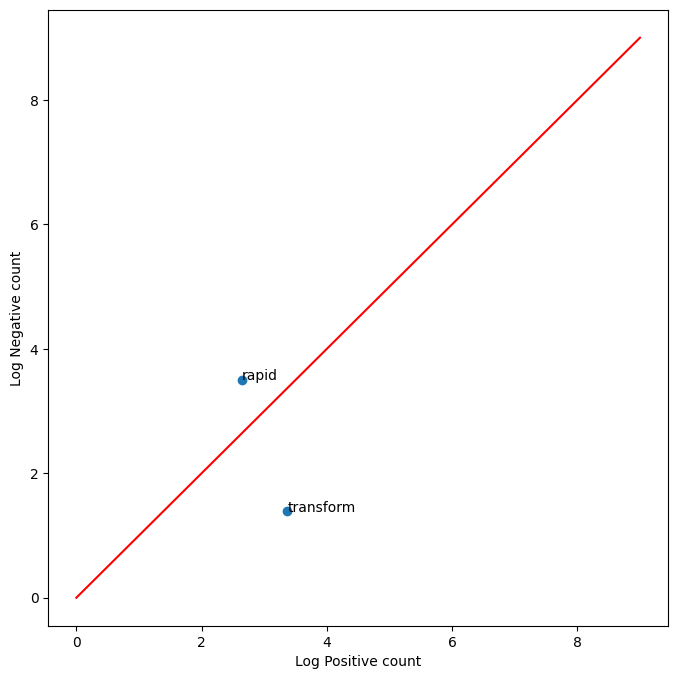

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8, 8))
word1 = "transform"
word2 = "rapid"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

# **Constructing Features:**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

* Create a `fit_cv` function used to build the Bag-of-Words vectorizer with the corpus

In [ ]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x, ngram_range=(1,1))
  cv_vect.fit(tweet_corpus)
  return cv_vect

* Use the `fit_cv` function to fit the vectorizer on the corpus

In [ ]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Get the vectorizer features (matrix columns)

In [ ]:
ft = cv_vect.get_feature_names_out()

In [ ]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 11639 features in this corpus
['aa' 'aactiv' 'aaeal' ... 'zoom' 'zroom' 'à']


* Convert the corpus to a matrix by using the vectorize

In [ ]:
cv_mtx = cv_vect.transform(corpus)

* Print the matrix shape

In [ ]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (2750, 11639)


* Convert the matrix to an array

In [ ]:
cv_mtx.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

* Transform a new tweet by using the vectorizer

In [ ]:
new_tweet = [["machine", "learn","subset"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
unknown_tweet = [["zoom", "artific", "car"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, ..., 1, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def fit_cv(tweet_corpus):
    # Add ngram_range parameter to extract unigrams, bigrams, and trigrams
    cv_vect = CountVectorizer(tokenizer=lambda x: x,
                              preprocessor=lambda x: x,
                              ngram_range=(1,2)) #represent Unigrams, Bigrams, and Trigrams
    cv_vect.fit(tweet_corpus)
    return cv_vect

cv_vect = fit_cv(corpus)
ft = cv_vect.get_feature_names_out()
print("There are {} features in this corpus".format(len(ft)))
print(ft)

cv_mtx = cv_vect.transform(corpus)
print("Matrix shape is: {}".format(cv_mtx.shape))
print(cv_mtx.toarray())


There are 163504 features in this corpus
['aa' 'aa betoto' 'aa faato' ... 'zroom car' 'à' 'à piston']
Matrix shape is: (2750, 163504)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
tweet = [["machin","learn","zoom","car","piston"]]
cv_vect.transform(tweet).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

#Term Frequency – Inverse Document Frequency (TF-IDF)

* Corpus of tweet tokens used for the third method

* Import `TfidfVectorizer` from the Scikit-learn Library

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

* Create a `fit_tfidf` function used to build the TF-IDF vectorizer with the corpus

In [ ]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

* Use the `fit_cv` function to fit the vectorizer on the corpus, and transform the corpus

In [ ]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

* Get the vectorizer features (matrix columns)

In [ ]:
ft = tf_vect.get_feature_names_out()

In [ ]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 11639 features in this corpus
['aa' 'aactiv' 'aaeal' ... 'zoom' 'zroom' 'à']


* Print the matrix shape

In [ ]:
print(tf_mtx.shape)

(2750, 11639)


* Convert the matrix to an array

In [ ]:
tf_mtx.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* Transform a new tweet by using the vectorizer

In [ ]:
new_tweet = [["machin", "car"]]
tf_vect.transform(new_tweet).toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

# **Model building:**

In [ ]:
x=corpus
y=sentiment

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0,
                                                    train_size=0.80)

In [ ]:
#Print size of train & Test
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 2200
Size of y_train: 2200


Size of X_test: 550
Size of y_test: 550


Train proportion: 80%


In [ ]:
import random

In [ ]:
#Check if its going right
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['dear', 'florida', 'state', 'senat', 'brought', 'attent', 'method', 'vote', 'shall', 'use', 'futur', 'elect', 'use', 'elector', 'colleg', 'method', 'look', 'back', 'previous', 'year', 'evid', 'method', 'caus', 'disput', 'due', 'problem', 'suggest', 'use', 'popular', 'vote', 'method', 'popular', 'vote', 'method', 'not', 'direct', 'vote', 'desir', 'candid', 'peopl', 'choic', 'method', 'also', 'less', 'complic', 'leav', 'less', 'room', 'mani', 'problem', 'initi', 'elector', 'colleg', 'vote', 'method', 'sound', 'like', 'great', 'idea', 'recent', 'studi', 'peopl', 'begin', 'becom', 'fond', 'popular', 'vote', 'method', 'popular', 'vote', 'method', 'direct', 'control', 'peopl', 'vote', 'sent', 'direct', 'desir', 'candid', 'side', 'use', 'elector', 'colleg', 'method', 'voter', 'vote', 'select', 'member', 'state', 'elector', 'colleg', 'vote', 'member', 'elig', 'vote', 'presidenti', 'candid', 'choic', 'accord', 'articl', 'defens', 'elector', 'colleg', 'five', 'reason', 'keep', 'des

## **6.2** Logistic Regression


In [ ]:
import sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create a `fit_lr` function used to fit a Logistic Regression model on X and y
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

In [ ]:
#Postive & Negative Frequency
# Use the `build_freqs` function on training data to create a frequency dictionnary
# Use the frequency dictionnary together with the `tweet_to_freq` function to convert X_train and X_test data to 2-d vectors
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

# **This is the postive negative model:**

In [ ]:
#Fit the Logistic Regression model on training data by using the `fit_lr` function
#Print the model coefficients (betas and intercept)
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 3.25425531e-04 -4.40321946e-05]] [5.77533544]


# **Bag of words model for count vectorizer**

In [ ]:
#Bag of words
#Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
#Transform X_train and X_test data by using the vectorizer
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#Fit the Logistic Regression model on training data by using the `fit_lr` function
model_lr_cv = fit_lr(X_train_cv, y_train)


In [ ]:
#Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
#Transform X_train and X_test data by using the vectorizer
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#Fit the Logistic Regression model on training data by using the `fit_lr` function
model_lr_tf = fit_lr(X_train_tf, y_train)

In [ ]:
#Import the `accuracy score` and `confusion matrix` from Scikit-Learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

Positive/Negative Frequencies


In [ ]:
# Use the fitted `model_lr_pn` (positive/negative frequencies) to predict X_test
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy: 99.82%


<module 'seaborn' from '/usr/local/lib/python3.12/dist-packages/seaborn/__init__.py'>

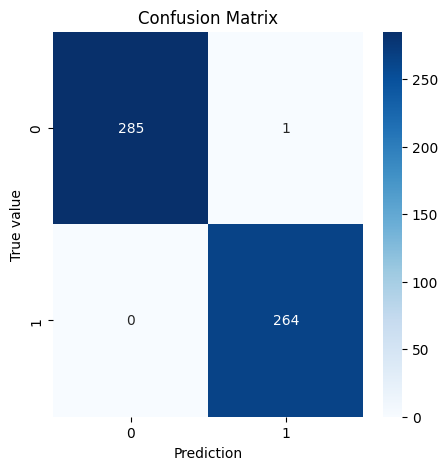

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

Count Vector


In [ ]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 100.00%


<module 'seaborn' from '/usr/local/lib/python3.12/dist-packages/seaborn/__init__.py'>

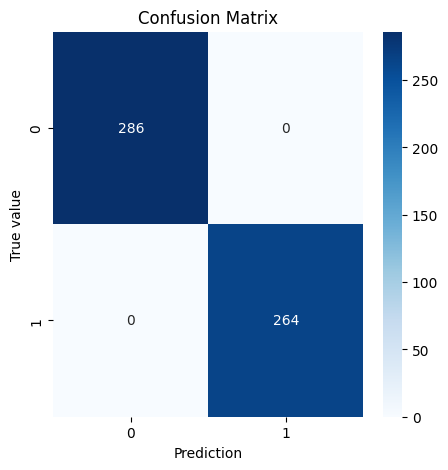

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

TF_IDF

In [ ]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))


LR Model Accuracy: 99.45%


In [ ]:
#accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))
print("LR Model Precision: {:.2%}".format(precision_score(y_test, y_pred_lr_tf)))
print("LR Model recall: {:.2%}".format(recall_score(y_test, y_pred_lr_tf)))
print("LR Model F1 score: {:.2%}".format(f1_score(y_test, y_pred_lr_tf)))



LR Model Accuracy: 99.45%
LR Model Precision: 98.88%
LR Model recall: 100.00%
LR Model F1 score: 99.44%


<module 'seaborn' from '/usr/local/lib/python3.12/dist-packages/seaborn/__init__.py'>

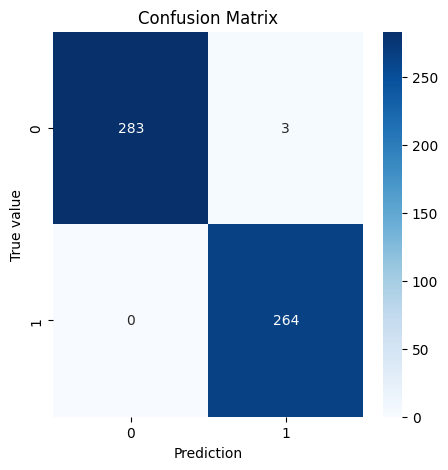

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

In [ ]:
from sklearn.metrics import roc_curve
prob = model_lr_pn.predict_proba(X_test_pn)
prob1 = model_lr_cv.predict_proba(X_test_cv)
prob2 = model_lr_tf.predict_proba(X_test_tf)

fpr, tpr, thresh = roc_curve(y_test, prob[:,1], pos_label=1)
fpr1, tpr1, thresh1 = roc_curve(y_test, prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, prob2[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
auc_score = roc_auc_score(y_test, prob[:,1])
auc_score1 = roc_auc_score(y_test, prob1[:,1])
auc_score2 = roc_auc_score(y_test, prob2[:,1])

print(auc_score ,auc_score1, auc_score2)

1.0 1.0 1.0


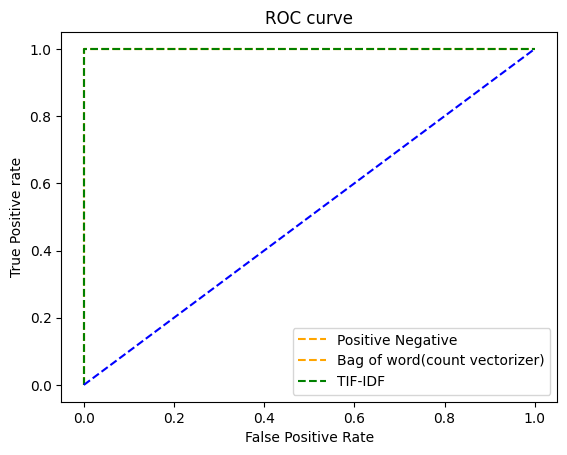

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, linestyle='--',color='orange', label='Positive Negative')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Bag of word(count vectorizer)')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='TIF-IDF')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
text = "i like the machine learning course"

In [ ]:
text1 = "hi my name is abdullah and today i will be talking about cars"

In [ ]:
def predict_tweet_pn(tweet):
    processed_tweet = process_tweet(tweet)

    tweet_features = tweet_to_freq(processed_tweet, freqs)

    prediction = model_lr_pn.predict([tweet_features])

    # 4. Return readable output
    if prediction == 1:
        return "Prediction is positive sentiment"
    else:
        return "Prediction is negative sentiment"

In [ ]:
def predict_tweet_cv(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = cv.transform([processed_tweet])
  prediction = model_lr_cv.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [ ]:
def predict_tweet_tf(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

# **Predicitons for the PN**

In [ ]:
predict_tweet_pn(text)

'Prediction is positive sentiment'

In [ ]:
predict_tweet_pn(text1)

'Prediction is positive sentiment'

# **Predictions for The CV**

In [ ]:
predict_tweet_cv(text)

'Prediction is positive sentiment'

In [ ]:
predict_tweet_cv(text1)

'Prediction is positive sentiment'

# **Predictions for the TF-IDF Model**

In [ ]:
predict_tweet_tf(text)

'Prediction is positive sentiment'

In [ ]:
predict_tweet_tf(text1)

'Prediction is negative sentiment'